# <span style="color:darkorange"> analysis

In [210]:
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [211]:
dataset = pd.read_json('vrg.json')
dataset.head()

,id,link,title,name,tripcode,time,type,replies,image,content,board,isop
0,264108813,https://arch.b4k.co/vg/thread/264108813/#q2641...,/vrg/ - Virtual Reality General #613,Anonymous,None,2019-08-28T12:02:23+00:00,deleted,"[>>264109025, >>264145456]",{'2019-08-22 17_27_48-Greenshot.jpg': 'https:/...,"""Virtual Reality, Real Suffering""™ >Introducti...",vg,True
1,264109025,https://arch.b4k.co/vg/thread/264108813/#q2641...,None,Anonymous,None,2019-08-28T12:06:11+00:00,None,"[>>264112514, >>264113220]",{'VRChat_1920x1080_2019-08-25_02-1 (...).png':...,>>264108813 furst for you could have picked a ...,vg,False
2,264109245,https://arch.b4k.co/vg/thread/264108813/#q2641...,None,Anonymous,None,2019-08-28T12:10:15+00:00,None,"[>>264109319, >>264111214]",{'VRChat_1920x1080_2019-08-26_23-1 (...).png':...,,vg,False
3,264109248,https://arch.b4k.co/vg/thread/264108813/#q2641...,None,Anonymous,None,2019-08-28T12:10:16+00:00,None,[>>264110173],None,"Also, anyone tried the new NMS experimental ye...",vg,False
4,264109319,https://arch.b4k.co/vg/thread/264108813/#q2641...,None,Anonymous,None,2019-08-28T12:11:35+00:00,None,[>>264109472],None,>>264109245 Please keep trash meetup group pho...,vg,False


In [212]:
#convert time to datetime
dataset['time'] = pd.to_datetime(dataset['time'])

#create year from time
dataset['year'] = dataset['time'].dt.year

#create month and year
dataset['month'] = dataset['time'].dt.month

#create a year-month column for grouping
dataset['year_month'] = dataset['year'].map(str) + '-' + dataset['month'].map(str)

#replace all None in Type with 'normal'
dataset['type'] = dataset['type'].fillna('normal')

In [213]:
dataset.shape

(689083, 15)

In [214]:
#check missing values
dataset.isnull().sum()

id                 0
link               0
title         688116
name               0
tripcode      688506
time               0
type               0
replies       318228
image         537768
content            0
board              0
isop               0
year               0
month              0
year_month         0
dtype: int64

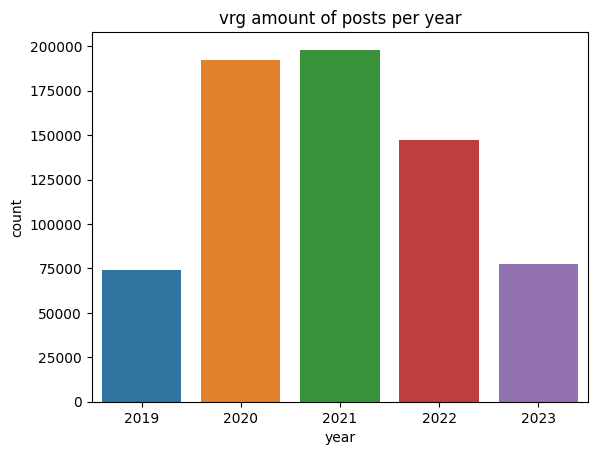

In [215]:
#create countplot from year
sns.countplot(x="year", data=dataset)
plt.title('vrg amount of posts per year')
plt.show()

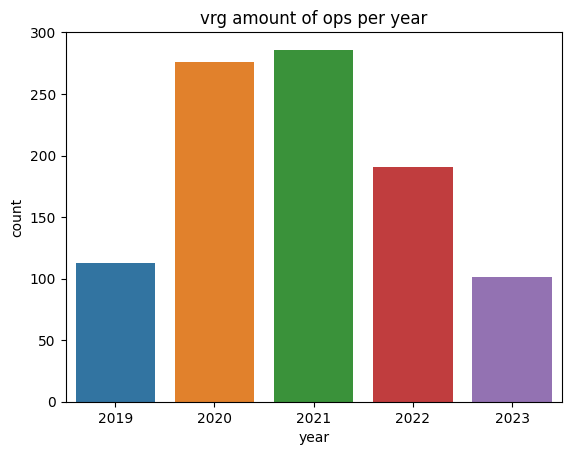

In [216]:
#create countplot from year for ops
sns.countplot(x="year", data=dataset[dataset['isop'] == True])
plt.title('vrg amount of ops per year')
plt.show()

these are practically identical

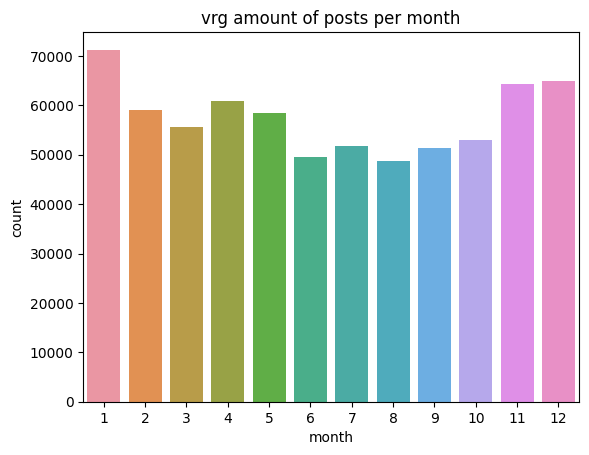

In [217]:
#create countplot from month for posts
sns.countplot(x="month", data=dataset)
plt.title('vrg amount of posts per month')
plt.show()

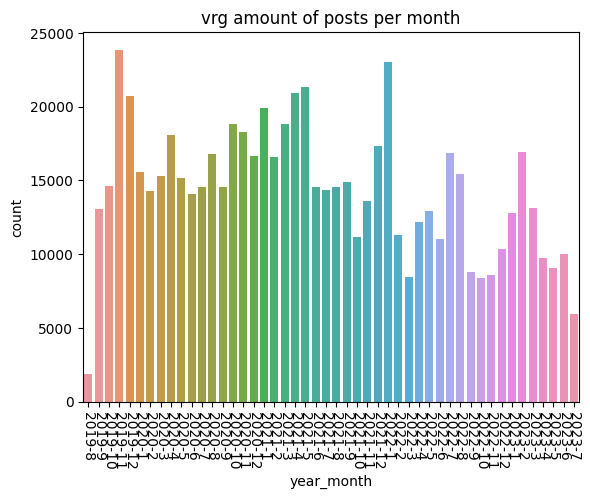

In [218]:
#create countplot from year-month for posts
sns.countplot(x="year_month", data=dataset)
plt.title('vrg amount of posts per month')
plt.xticks(rotation=-90)
plt.show()

In [219]:
#create 

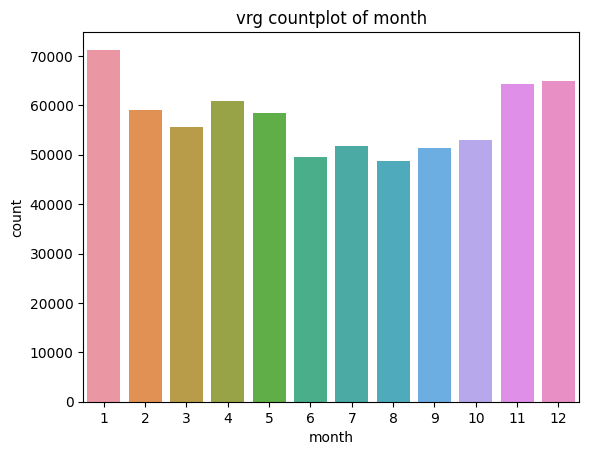

In [220]:
#create countplot from month
sns.countplot(x="month", data=dataset)
plt.title('vrg countplot of month')
plt.show()

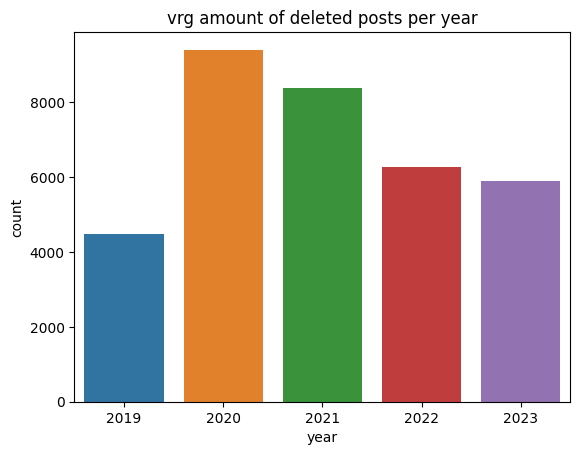

In [221]:
#create countplot from year for deleted posts
sns.countplot(x="year", data=dataset[dataset['type'] == "deleted"])
plt.title('vrg amount of deleted posts per year')
plt.show()

In [222]:
#create ratio deleted posts to all posts column per year
pivot_df = dataset.groupby(['year', 'type']).size().reset_index(name='Count').pivot(index='year', columns='type', values='Count')
pivot_df['deleted_ratio_year'] = (pivot_df['deleted'] / (pivot_df['normal'] + pivot_df['spoiler'])) * 100
#turn the index into a column
pivot_df.reset_index(level=0, inplace=True)
print(pivot_df)

type  year  deleted  normal  spoiler  deleted_ratio_year
0     2019     4481   69462      194            6.433042
1     2020     9403  182168      460            5.148718
2     2021     8377  188886      758            4.417224
3     2022     6258  140626      379            4.438140
4     2023     5893   71582      156            8.214614


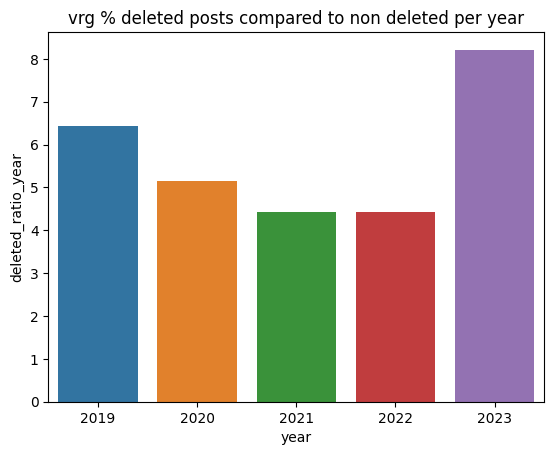

In [223]:
#create countplot from year for deleted posts ratio
sns.barplot(x="year",y="deleted_ratio_year", data=pivot_df)
plt.title('vrg % deleted posts compared to non deleted per year')
plt.show()

In [224]:
#create thread number column from title
dataset['thread_number'] = dataset['title'].str.extract('(\d+)', expand=False)
#print all thread numbers that arent null
print(dataset[dataset['thread_number'].notnull()]['thread_number'])
#convert thread number to int
dataset['thread_number'] = dataset[dataset['thread_number'].notnull()]['thread_number'].astype(int)
#get minimum thread number and maximum thread number
print(dataset[dataset['thread_number'].notnull()]['thread_number'].min())
print(dataset[dataset['thread_number'].notnull()]['thread_number'].max())


0          613
782        614
1588       615
2386       615
2387       616
          ... 
685713    1465
686493    1466
687261    1467
688030    1468
688823    1469
Name: thread_number, Length: 951, dtype: object
122.0
424459126.0


In [225]:
#print all titles that arent null
print(dataset[dataset['title'].notnull()]['title'])

0          /vrg/ - Virtual Reality General #613
782        /vrg/ - Virtual Reality General #614
1588       /vrg/ - Virtual Reality General #615
2386       /vrg/ - Virtual Reality General #615
2387       /vrg/ - Virtual Reality General #616
                          ...                  
685713    /vrg/ - Virtual Reality General #1465
686493    /vrg/ - Virtual Reality General #1466
687261    /vrg/ - Virtual Reality General #1467
688030    /vrg/ - Virtual Reality General #1468
688823    /vrg/ - Virtual Reality General #1469
Name: title, Length: 967, dtype: object


## preprocesing

In [226]:
def remove_ref(input_string):
    pattern = r">>\d{9}"
    return re.sub(pattern, "", input_string)
def remove_links(input_string):
    pattern = r'http[s]?://\S+|www\.\S+'
    return re.sub(pattern, '', input_string)

In [227]:
#remove all posts that are the op of a thread
dataset = dataset[dataset['isop'] == False]
#remove all posts that are deleted
dataset = dataset[dataset['type'] != 'deleted']
#remove all posts that have >> in the text
dataset['content'] = dataset['content'].apply(remove_ref)
#remove all posts that have links in the text
dataset['content'] = dataset['content'].apply(remove_links)
#remove all empty content posts
dataset = dataset[dataset['content'] != '']

In [228]:
#shuffle dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [229]:
dataset.head()

,id,link,title,name,tripcode,time,type,replies,image,content,board,isop,year,month,year_month,thread_number
0,302907085,https://arch.b4k.co/vg/thread/302862435/#q3029...,None,Anonymous,None,2020-08-11 07:27:12+00:00,normal,[>>302907573],None,theres no way to actually leave the room?,vg,False,2020,8,2020-8,NaN
1,311083707,https://arch.b4k.co/vg/thread/311027012/#q3110...,None,Anonymous,None,2020-10-21 03:12:35+00:00,normal,"[>>311083851, >>311085618]",{'file.png': 'https://arch-img.b4k.co/vg/16032...,I'm being stalked by shoebills. Actually miss ...,vg,False,2020,10,2020-10,NaN
2,388387790,https://arch.b4k.co/vg/thread/388155049/#q3883...,None,Anonymous,None,2022-06-17 02:22:33+00:00,normal,None,None,do,vg,False,2022,6,2022-6,NaN
3,288967148,https://arch.b4k.co/vg/thread/288927030/#q2889...,None,Anonymous,None,2020-04-23 00:12:47+00:00,normal,"[>>288967272, >>288968604]",{'VRChat_1920x1080_2020-04-22_17-1 (...).png':...,we are playing,vg,False,2020,4,2020-4,NaN
4,277344151,https://arch.b4k.co/vg/thread/277247123/#q2773...,None,Anonymous,None,2020-01-06 05:25:50+00:00,normal,[>>277344536],None,Thanks that's reassuring. I've been planning...,vg,False,2020,1,2020-1,NaN


In [230]:
new_json_filename = "vrg_clean.json"

In [231]:
# dataset = pd.read_json(old_json_filename)
dataset = dataset[dataset['isop'] == False]
dataset = dataset[dataset['type'] != 'deleted']
dataset['content'] = dataset['content'].apply(remove_ref)
dataset['content'] = dataset['content'].apply(remove_links)
dataset = dataset[dataset['content'] != '']
dataset = dataset.drop(columns=dataset.columns.difference(['content']))
dataset = dataset.reset_index(drop=True)
#remove index
# dataset = dataset.drop_duplicates()
dataset.rename(columns={'content': 'text'}, inplace=True)
dataset.head()


,text
0,theres no way to actually leave the room?
1,I'm being stalked by shoebills. Actually miss ...
2,do
3,we are playing
4,Thanks that's reassuring. I've been planning...
